In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")

# Fixed values and functions for all plots

In [2]:
# # Loads algae names
# with open('../../fixed_values-pickles/pickle_files/algae_names.pkl', 'rb') as fp:
# 	algae_names = pickle.load(fp)

# # Loads content types (ashes, moisture, ...)
# with open('../../fixed_values-pickles/pickle_files/content_types.pkl', 'rb') as fp:
# 	content_types = pickle.load(fp)

# control_color = '#FFFFFF' # white
# xlabel = 'Burger type'
# ylabel = 'Percentage of '

# def get_contenttype(in_ct):
# 	content_type = content_types[in_ct]
# 	return content_type

# def set_filename(alga, ct):
# 	filename = alga + '_' + ct
# 	return filename

In [3]:
def csv_to_dic(csv_file):
	'''Funzione che inserisce i dati dei csv delle buy responses in un dizionario 
		{burger_type: { buy_response : occurrences }, ... }
	formattando il tutto'''

	# Given a series/column, makes a dic {answer : counts}
	def occurrences_dic(column):
		return column.value_counts().to_dict()

	# Load the CSV file into a DataFrame
	df = pd.read_csv(csv_file)

	# Counts the columns
	n_columns = len(df.columns)

	# Initialize the dictionary
	dic = {}

	# Iterates for every column of the csv
	for column in range(n_columns):

		# Selects only the current column
		sel_column = df.iloc[:, column]
		
		# If the csv is a "buy type" (the ones with more than one column)
		if n_columns != 1:

			# Get and format the header
			header = sel_column.name
			header = header[-3:-1] # Write [-2:-1] for only the letter

			# Makes dic {answer : counts}
			occurrences = occurrences_dic(sel_column)
			dic[header] = occurrences
		
		# If the csv is a "prefer type" (the ones with only one column)
		else:
			dic = occurrences_dic(sel_column)

	return dic

In [4]:
def pieplot(data, filename, colors):
	'''Crea un pieplot per ...'''
	# Definizione dati
	labels = data.keys()
	values = data.values()

	# Calcola la percentuale
	def make_autopct(values):
		def my_autopct(pct):
			total = sum(values)
			val = int(round(pct*total/100.0))
			return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
		return my_autopct

	# Crea il pieplot
	plt.pie(values, labels = labels, colors=colors, autopct=make_autopct(values))
	plt.savefig('google_forms-outs/' + filename + '.pdf', format="pdf")
	plt.close()
	

# Diets (personal info)

In [5]:
diet_color_1 = '#801818' # 
diet_color_2 = '#004225' # 
diet_color_3 = '#AD2624' # 
diet_colors = [diet_color_1, diet_color_2, diet_color_3]

# Burger samples (sensory analysis)

## Fixed values and functions for burger samples (sensory analysis)

In [7]:
preferences_colors_1 = '#801818' # 
preferences_colors_2 = '#004225' # 
preferences_colors_3 = '#AD2624' # 
preferences_colors = [preferences_colors_1, preferences_colors_2, preferences_colors_3]

In [8]:
buy_color_1 = '#801818' # 
buy_color_2 = '#003250' # 
buy_color_3 = '#AD2624' # 
buy_color_4 = '#004225' # 
buy_color_5 = '#800020' #
buy_colors = [buy_color_1, buy_color_2, buy_color_3, buy_color_4, buy_color_5] 

In [9]:
buy_categories = {
	'cat_1': ['Certainly would not buy'],
	'cat_2': ['Probably would not buy', 'Maybe would buy', 'Probably would buy'],
	'cat_3': ['Certainly would buy']
}

In [10]:
def gather_buy_responses(dic, buy_categories):
	'''
	Funzione che a partire da un dizionario
		{ buy_response : occurrences, ... }
	e un dizionario
		{ nome_categoria : [buy_response_1, ...] }
	restituisce un dizionario con:
		chiavi -> le buy_responses raggruppate per categoria
		valori -> i conteggi di quella categoria di buy_responses
	'''
	sr = pd.Series(dic)

	gathered_categories = {}

	# Iterate for every category
	for category in buy_categories:

		# Compute occurrences of every category
		sum = sr.loc[buy_categories[category]].sum()
		gathered_categories[category] = sum

	return gathered_categories

In [11]:
def barplot(data, filename, buy_categories, colors):

	for burger_type in data:
		# burger_type is like 1A, 1B, 2A, 2B, etc...
		
		# Gathers responses into positive, negative, etc...
		data_gathered = gather_buy_responses(data[burger_type], buy_categories)

		x = data_gathered.keys()
		y = data_gathered.values()

		barplot = sns.barplot(x=x, y=y, errorbar=None)

		for bar, color in zip(barplot.patches, colors):
			bar.set_color(color)
			bar.set_edgecolor('#000000')
			bar.set_linewidth(1)

		plt.ylabel('Number of reponses')

		plt.savefig('google_forms-outs/' + filename + '.pdf', format="pdf")
		plt.close()

# Let's make the plots

In [12]:
data_path = 'data-google_forms/structured/'

for csv in os.listdir(data_path):
	
	dic = csv_to_dic(data_path + csv)
	
	if csv == 'diet.csv':
		pieplot(dic, csv[:-4], diet_colors)
	
	elif csv.endswith('-prefer.csv'):
		pieplot(dic, csv[:-4], preferences_colors)
	
	elif csv.endswith('-buy.csv'):
		barplot(dic, csv[:-4], buy_categories, buy_colors)

sample_3-buy.csv
diet.csv
sample_1-buy.csv
sample_1-prefer.csv
sample_2-buy.csv
sample_3-prefer.csv
sample_2-prefer.csv


## Sample 1

### Sample 1 - preferences

In [13]:
sample_1 = csv_to_dic('data-google_forms/structured/sample_3-prefer.csv')

print(sample_1)

pieplot(sample_1, preferences_colors)

{'3C': 22, '3B': 14, '3A': 5}


TypeError: pieplot() missing 1 required positional argument: 'colors'

## Sample 2

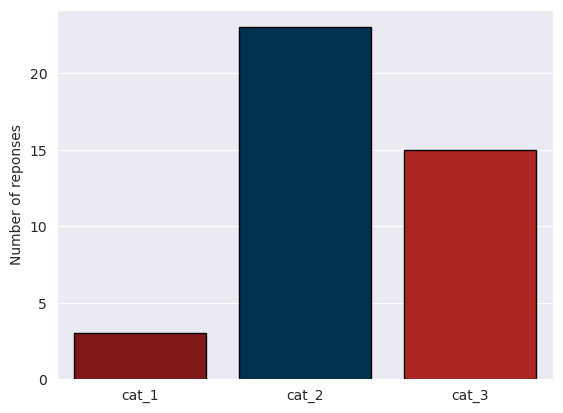

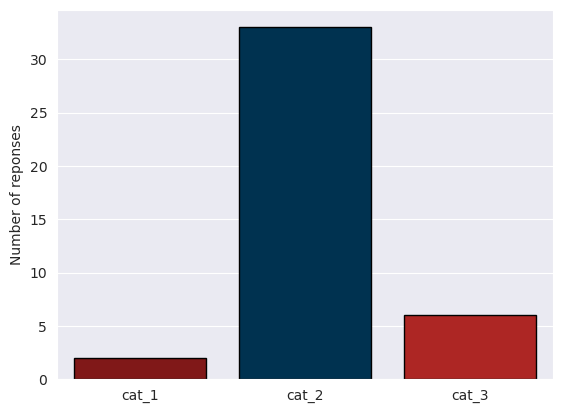

In [ ]:
sample_1 = csv_to_dic('data-google_forms/sample_1-buy.csv')

barplot(sample_1, buy_categories, buy_colors)

## Sample 3